## Recommendations for Movies

  ## Introduction 

Film, also called movie, motion picture or moving picture, is a visual art-form used to simulate experiences that communicate ideas, stories, perceptions, feelings, beauty, or atmosphere through the use of moving images. These images are generally accompanied by sound, and more rarely, other sensory stimulations.[1] The word "cinema", short for cinematography, is often used to refer to filmmaking and the film industry, and to the art form that is the result of it.

The moving images of a film are created by photographing actual scenes with a motion-picture camera, by photographing drawings or miniature models using traditional animation techniques, by means of CGI and computer animation, or by a combination of some or all of these techniques, and other visual effects.

Traditionally, films were recorded onto celluloid film stock through a photochemical process and then shown through a movie projector onto a large screen. Contemporary films are often fully digital through the entire process of production, distribution, and exhibition, while films recorded in a photochemical form traditionally included an analogous optical soundtrack (a graphic recording of the spoken words, music and other sounds that accompany the images which runs along a portion of the film exclusively reserved for it, and is not projected).

Films are cultural artifacts created by specific cultures. They reflect those cultures, and, in turn, affect them. Film is considered to be an important art form, a source of popular entertainment, and a powerful medium for educating—or indoctrinating—citizens. The visual basis of film gives it a universal power of communication. Some films have become popular worldwide attractions through the use of dubbing or subtitles to translate the dialog into other languages.

The individual images that make up a film are called frames. In the projection of traditional celluloid films, a rotating shutter causes intervals of darkness as each frame, in turn, is moved into position to be projected, but the viewer does not notice the interruptions because of an effect known as persistence of vision, whereby the eye retains a visual image for a fraction of a second after its source disappears. The perception of motion is partly due to a psychological effect called the phi phenomenon.


Source: https://en.wikipedia.org/wiki/Film

## Dataset description

 
For this, I took a dataset which contain metadata for all 45,000 movies listed in the Full MovieLens Dataset. The dataset consists of movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts and vote averages.

This dataset also has files containing 26 million ratings from 270,000 users for all 45,000 movies. Ratings are on a scale of 1-5 and have been obtained from the official GroupLens website.

From the above description of Movie Stories, it can be said that every movie has its ups and downs, and every movie has many characteristics. And in this analysis, we will look and compare the various characteristics.



These files contain data for all 45,000 movies listed in the complete MovieLens dataset. The dataset consists of movies released before July 2017 or earlier. This data includes:
+ actors - list of actors
+ crews - crew members who participate in the filming
+ story - plot
+ keywords - each movie has keywords that help to find a specific movie
+ budget - shows what budget a certain film has
+ income -income from multiple sources, including film distribution, digital sale and rental, merchandising, and television broadcast and streaming rights.
+ posters - clothes, souvenirs and so on with your favorite movie or actor
+ release dates -the day the movie comes out
+ languages -languages in which viewing is available, such as Russian, English, Danish, German and so on
+ production companies - companies that produce films or animated series such as Warner Bros.
+ countries - some countries prohibit different films, games, so here you can see in which countries viewing is available
+ TMDB vote counts -
+ and vote averages

This dataset also contains files containing 26 million ratings from 270,000 users for all 45,000 films. The ratings are on a scale of 1 to 5 and are obtained from the official GroupLens website.

## Objectives
 Plan:
+ Clear dataset
+ Data visualization (Charts, Graphs, Tables)
+ Analyze results
+ Conclusion

Questions for project:

+ Find developer that have highest rating
+ Find platform that more preferable for gaming
+ Find developer that gained most of cash from games
+ Find most owned and played game genre
+ Find most frequent word in names of games

## Used libraries

In [1]:
import time                       #To set timeouts for search
import numpy as np 
import pandas as pd               #To work with datasets
import requests                   #To scrap data
from bs4 import BeautifulSoup     
import seaborn as sns
from ast import literal_eval
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.font_manager import FontProperties
import warnings
warnings.simplefilter("ignore")

## Imported Dataset

+ movies_metadata

+ credits

+ keywords

+ links

+ links_small.csv

+ ratings.csv

+ ratings_small.csv

But today we will only consider the movies_metadata,credits

## Working with dataset
The usen dataset was downloaded from kaggle.com.

Url: https://www.kaggle.com/rounakbanik/the-movies-dataset

This dataset is open sorced and any user can user data from it

I could not upload them to the github, because the file size was too large compared to what can be downloaded. Therefore, I uploaded it to google drive and left the link in the read me file


## DATA PREPARATION,Understanding the Dataset
movies_metadata:
+ adult: Indicates if the movie is X-Rated or Adult.
+ belongs_to_collection: A stringified dictionary that gives information on the movie series the particular film belongs to.
+ budget: The budget of the movie in dollars.
+ genres: A stringified list of dictionaries that list out all the genres associated with the movie.
+ homepage: The Official Homepage of the move.
+ id: The ID of the move.
+ imdb_id: The IMDB ID of the movie.
+ original_language: The language in which the movie was originally shot in.
+ original_title: The original title of the movie.
+ overview: A brief blurb of the movie.
+ popularity: The Popularity Score assigned by TMDB.
+ poster_path: The URL of the poster image.
+ production_companies: A stringified list of production companies involved with the making of the movie.
+ production_countries: A stringified list of countries where the movie was shot/produced in.
+ release_date: Theatrical Release Date of the movie.
+ revenue: The total revenue of the movie in dollars.
+ runtime: The runtime of the movie in minutes.
+ spoken_languages: A stringified list of spoken languages in the film.
+ status: The status of the movie (Released, To Be Released, Announced, etc.)
+ tagline: The tagline of the movie.
+ title: The Official Title of the movie.
+ video: Indicates if there is a video present of the movie with TMDB.
+ vote_average: The average rating of the movie.
+ vote_count: The number of votes by users, as counted by TMDB.

In [2]:
#Loading the datasets
md = pd.read_csv('movies_metadata.csv')
kw = pd.read_csv('keywords.csv')

## Checking all columns for null values

In this section, I will look for rows and columns with null values.

In [3]:
check = md.notnull()   #Finding null values
check.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,False,True,True,True,True
1,True,False,True,True,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,False,True,True,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [4]:
check.all()     #Checking all columns for null

adult                     True
belongs_to_collection    False
budget                    True
genres                    True
homepage                 False
id                        True
imdb_id                  False
original_language        False
original_title            True
overview                 False
popularity               False
poster_path              False
production_companies     False
production_countries     False
release_date             False
revenue                  False
runtime                  False
spoken_languages         False
status                   False
tagline                  False
title                    False
video                    False
vote_average             False
vote_count               False
dtype: bool

## Checking for duplicated data

In [5]:
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

We can see that there are some columns with missing values.Some of columns have full data,which are budget, genres,id.

In [6]:
duplicate = md.duplicated()
duplicate

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Length: 45466, dtype: bool

In [7]:
duplicate[duplicate].index.values   #find duplicited data

array([ 1465,  9165,  9327, 13375, 16764, 21165, 21854, 22151, 23044,
       24844, 28860, 29374, 40040], dtype=int64)

In [8]:
md = md.drop(duplicate[duplicate].index.values)  #Remove duplicated values
md.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


## Droping data that we will not use

In [9]:
md['genres'] = md['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [10]:
md['production_companies'] = md['production_companies'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [11]:
md.columns   #checking what columns are in our dataset

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [12]:
md = md.drop('imdb_id', axis=1)

In [13]:
md = md.drop('original_title', axis=1)

In [14]:
md = md.drop('adult', axis=1)

In [15]:
md = md.drop('video', axis=1)

In [16]:
md = md.drop('runtime',axis=1)

In [17]:
md = md.drop('tagline',axis=1)

In [18]:
md = md.drop('poster_path',axis=1)

In [19]:
md = md.drop('spoken_languages',axis=1)

In [20]:
movies = md[['id','title', 'genres', 'release_date', 'overview', 
             'vote_average', 'vote_count','popularity']]
movies.head(10)

,id,title,genres,release_date,overview,vote_average,vote_count,popularity
0,862,Toy Story,"[Animation, Comedy, Family]",1995-10-30,"Led by Woody, Andy's toys live happily in his ...",7.7,5415.0,21.9469
1,8844,Jumanji,"[Adventure, Fantasy, Family]",1995-12-15,When siblings Judy and Peter discover an encha...,6.9,2413.0,17.0155
2,15602,Grumpier Old Men,"[Romance, Comedy]",1995-12-22,A family wedding reignites the ancient feud be...,6.5,92.0,11.7129
3,31357,Waiting to Exhale,"[Comedy, Drama, Romance]",1995-12-22,"Cheated on, mistreated and stepped on, the wom...",6.1,34.0,3.85949
4,11862,Father of the Bride Part II,[Comedy],1995-02-10,Just when George Banks has recovered from his ...,5.7,173.0,8.38752
5,949,Heat,"[Action, Crime, Drama, Thriller]",1995-12-15,"Obsessive master thief, Neil McCauley leads a ...",7.7,1886.0,17.9249
6,11860,Sabrina,"[Comedy, Romance]",1995-12-15,An ugly duckling having undergone a remarkable...,6.2,141.0,6.67728
7,45325,Tom and Huck,"[Action, Adventure, Drama, Family]",1995-12-22,"A mischievous young boy, Tom Sawyer, witnesses...",5.4,45.0,2.56116
8,9091,Sudden Death,"[Action, Adventure, Thriller]",1995-12-22,International action superstar Jean Claude Van...,5.5,174.0,5.23158
9,710,GoldenEye,"[Adventure, Action, Thriller]",1995-11-16,James Bond must unmask the mysterious head of ...,6.6,1194.0,14.686


Now we have clean data that we can further use in our charts

After all this, we will consider the data in credits

In [21]:
credits = pd.read_csv('credits.csv') 

In [22]:
credits.head(5)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [23]:
credits.cast = credits.cast.apply(literal_eval)
credits.crew = credits.crew.apply(literal_eval)

In [24]:
# Extracting the Casts into a list from Dictionaries
credits['cast'] = credits['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [25]:
# Extracting the Director from the Crew
def extract_director(x):
    for crew_mem in x:
        if crew_mem['job'] == 'Director':
            return crew_mem['name']
        else:
            return np.nan

credits['director'] = credits['crew'].apply(extract_director)
credits['director'].fillna('',inplace = True)

In [26]:
credits.drop(['crew'],axis = 1,inplace = True)
credits.head()

,cast,id,director
0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",862,John Lasseter
1,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",8844,
2,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",15602,Howard Deutch
3,"[Whitney Houston, Angela Bassett, Loretta Devi...",31357,Forest Whitaker
4,"[Steve Martin, Diane Keaton, Martin Short, Kim...",11862,


Data is now nice to look at

In [27]:
# Dropping Duplicates 
credits.drop_duplicates('id',inplace = True)
md.drop_duplicates('id',inplace = True) 

## Solutions for problems

## Q1 Find the highest rated movie

In [28]:
rm1=movies[['title','vote_average','vote_count']] #Get 3 columns from main dataframe
rm1.head(10)

,title,vote_average,vote_count
0,Toy Story,7.7,5415.0
1,Jumanji,6.9,2413.0
2,Grumpier Old Men,6.5,92.0
3,Waiting to Exhale,6.1,34.0
4,Father of the Bride Part II,5.7,173.0
5,Heat,7.7,1886.0
6,Sabrina,6.2,141.0
7,Tom and Huck,5.4,45.0
8,Sudden Death,5.5,174.0
9,GoldenEye,6.6,1194.0


Now our dataframe rm1 has data on the name of the movie, it average rating and the number of times it was voted

In [29]:
rm2=rm1.sort_values(by=['vote_count'],ascending=0).head(10) #Sort rows by vote_count
rm2

,title,vote_average,vote_count
15480,Inception,8.1,14075.0
12481,The Dark Knight,8.3,12269.0
14551,Avatar,7.2,12114.0
17818,The Avengers,7.4,12000.0
26564,Deadpool,7.4,11444.0
22879,Interstellar,8.1,11187.0
20051,Django Unchained,7.8,10297.0
23753,Guardians of the Galaxy,7.9,10014.0
2843,Fight Club,8.3,9678.0
18244,The Hunger Games,6.9,9634.0


In [30]:
# Apply the default theme
sns.set_theme()

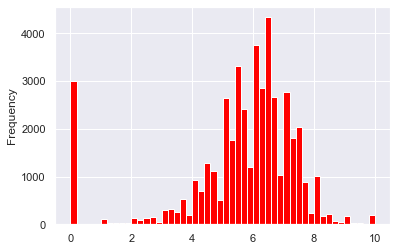

In [31]:
rm1['vote_average'].plot(bins=50,kind='hist',color='red')
plt.ioff()

We can see from the distribution that most of the moves rating falls i the range 4 to 8.

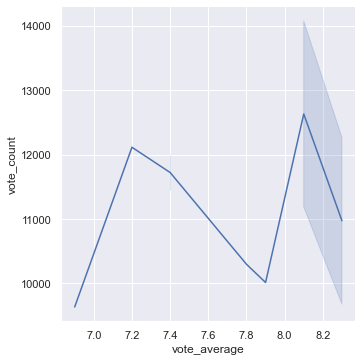

In [32]:
sns.relplot(data=rm2, kind="line",
    x="vote_average", y="vote_count" 
);

Looking at the films in the first chart with the most votes(first 10 rows form dataframe), we can see that most of them also have a pretty good average rating. The lowest vote_average among Top10 films with the highest number of votes is in the 6.5-7 area.and the highest in the 8.0-8.2 region.

Now let's see which of them is in the top 10 ranked.

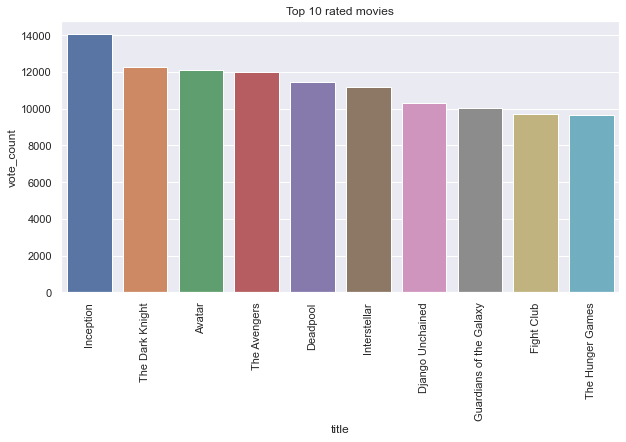

In [33]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="title", y="vote_count", data=rm2,  ax=ax)
ax.set_title("Top 10 rated movies")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

On the graph we see the names of the films and how many people voted for these films. The most voted film is "Inception" with 14000 votes. We can also notice that the next 3 films have the same votes. And it ranks 10th in our top rated "hunger games" with votes from 9000-10000.

## Q2 Find Top 10 revenue movies

In [34]:
br1= md[[ 'title', 'budget', 'release_date', 'revenue', 'popularity']]
br1

,title,budget,release_date,revenue,popularity
0,Toy Story,30000000,1995-10-30,373554033.0,21.9469
1,Jumanji,65000000,1995-12-15,262797249.0,17.0155
2,Grumpier Old Men,0,1995-12-22,0.0,11.7129
3,Waiting to Exhale,16000000,1995-12-22,81452156.0,3.85949
4,Father of the Bride Part II,0,1995-02-10,76578911.0,8.38752
...,...,...,...,...,...
45461,Subdue,0,NaN,0.0,0.072051
45462,Century of Birthing,0,2011-11-17,0.0,0.178241
45463,Betrayal,0,2003-08-01,0.0,0.903007
45464,Satan Triumphant,0,1917-10-21,0.0,0.003503


In [35]:
br2=br1.sort_values(by=['revenue'],ascending=0).head(10) #Sort rows by revenue
br2

,title,budget,release_date,revenue,popularity
14551,Avatar,237000000,2009-12-10,2.787965e+09,185.071
26555,Star Wars: The Force Awakens,245000000,2015-12-15,2.068224e+09,31.626
1639,Titanic,200000000,1997-11-18,1.845034e+09,26.8891
17818,The Avengers,220000000,2012-04-25,1.519558e+09,89.8876
25084,Jurassic World,150000000,2015-06-09,1.513529e+09,32.7905
28830,Furious 7,190000000,2015-04-01,1.506249e+09,27.2757
26558,Avengers: Age of Ultron,280000000,2015-04-22,1.405404e+09,37.3794
17437,Harry Potter and the Deathly Hallows: Part 2,125000000,2011-07-07,1.342000e+09,24.9907
22110,Frozen,150000000,2013-11-27,1.274219e+09,24.2482
42222,Beauty and the Beast,160000000,2017-03-16,1.262886e+09,287.253654


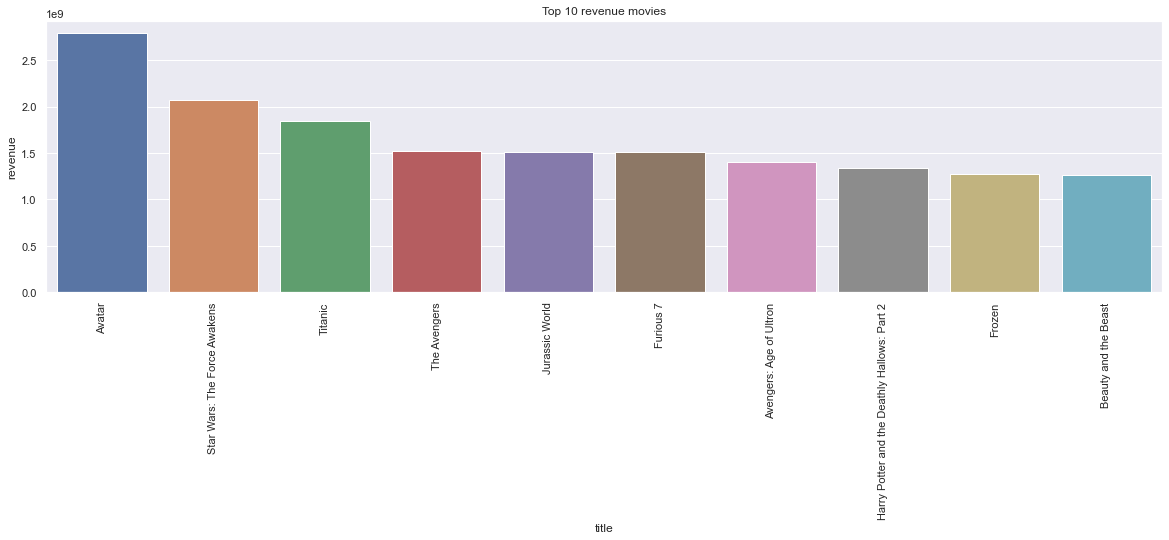

In [36]:
fig_dims = (20, 5)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="title", y="revenue", data=br2,  ax=ax)
ax.set_title("Top 10 revenue movies")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

 Here we see the top 10 profitable films. Avatar is the most profitable, securing its position in 1st place by a wide margin compared to other films

## Q3 Find popular movies

In [37]:
nm1= md[[ 'title', 'release_date', 'genres', 'popularity' ]]
nm2= nm1.head(10)
nm2

,title,release_date,genres,popularity
0,Toy Story,1995-10-30,"[Animation, Comedy, Family]",21.9469
1,Jumanji,1995-12-15,"[Adventure, Fantasy, Family]",17.0155
2,Grumpier Old Men,1995-12-22,"[Romance, Comedy]",11.7129
3,Waiting to Exhale,1995-12-22,"[Comedy, Drama, Romance]",3.85949
4,Father of the Bride Part II,1995-02-10,[Comedy],8.38752
5,Heat,1995-12-15,"[Action, Crime, Drama, Thriller]",17.9249
6,Sabrina,1995-12-15,"[Comedy, Romance]",6.67728
7,Tom and Huck,1995-12-22,"[Action, Adventure, Drama, Family]",2.56116
8,Sudden Death,1995-12-22,"[Action, Adventure, Thriller]",5.23158
9,GoldenEye,1995-11-16,"[Adventure, Action, Thriller]",14.686


In [38]:
nm2=nm2.sort_values(by=['popularity'],ascending=0).head(10) #Sort rows by popularity
nm2    

,title,release_date,genres,popularity
0,Toy Story,1995-10-30,"[Animation, Comedy, Family]",21.9469
5,Heat,1995-12-15,"[Action, Crime, Drama, Thriller]",17.9249
1,Jumanji,1995-12-15,"[Adventure, Fantasy, Family]",17.0155
9,GoldenEye,1995-11-16,"[Adventure, Action, Thriller]",14.686
2,Grumpier Old Men,1995-12-22,"[Romance, Comedy]",11.7129
4,Father of the Bride Part II,1995-02-10,[Comedy],8.38752
6,Sabrina,1995-12-15,"[Comedy, Romance]",6.67728
8,Sudden Death,1995-12-22,"[Action, Adventure, Thriller]",5.23158
3,Waiting to Exhale,1995-12-22,"[Comedy, Drama, Romance]",3.85949
7,Tom and Huck,1995-12-22,"[Action, Adventure, Drama, Family]",2.56116


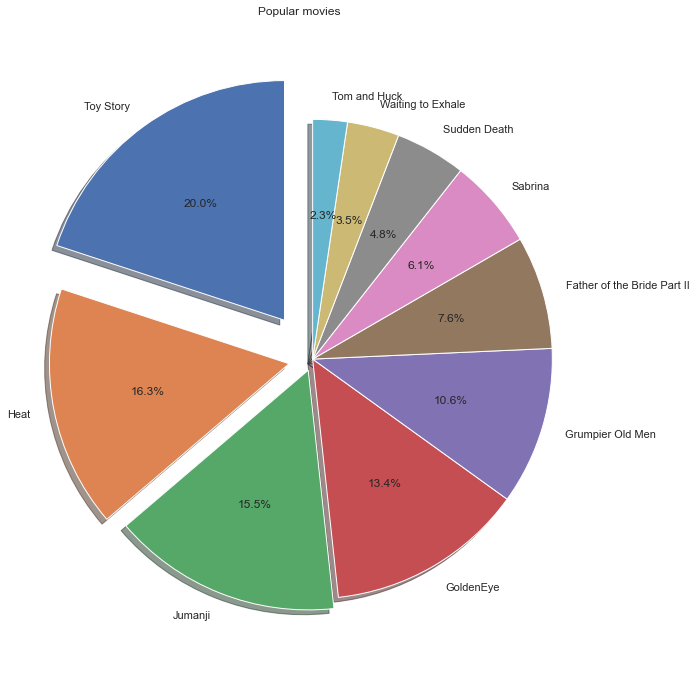

In [39]:
labels = ['Toy Story', 'Heat','Jumanji','GoldenEye','Grumpier Old Men','Father of the Bride Part II','Sabrina','Sudden Death','Waiting to Exhale','Tom and Huck']
sizes = [21.9464,17.9249,17.0155,14.686,11.7129,8.38752,6.67728,5.23158,3.85949,2.56116]
explode = (0.2, 0.1, 0.05, 0, 0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig_dims = (10, 12)
fig, ax = plt.subplots(figsize=fig_dims)
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
ax.set_title('Popular movies')
plt.show()

In the pie chart, we divided the popular films by title and selected the most popular ones more precisely, the first 3 films, where the first film has 20%, the second 16%, and the third 15%. We can also see which of the films are not popular.

## Q4 What are the most common words in films?

In [40]:
md['title'] = md['title'].astype('str')
md['overview'] = md['overview'].astype('str')

In [41]:
title_corpus = ' '.join(md['title'])
overview_corpus = ' '.join(md['overview'])

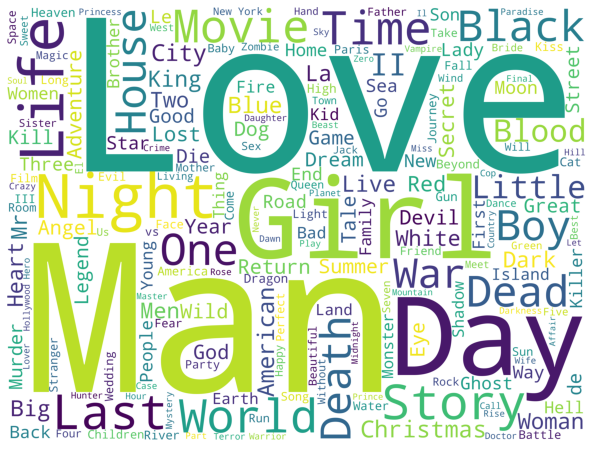

In [42]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=3000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

The word "love" is more commonly used in movie titles. "Girl", "Day" and "Man" are also common, thus showing that romance is papular.

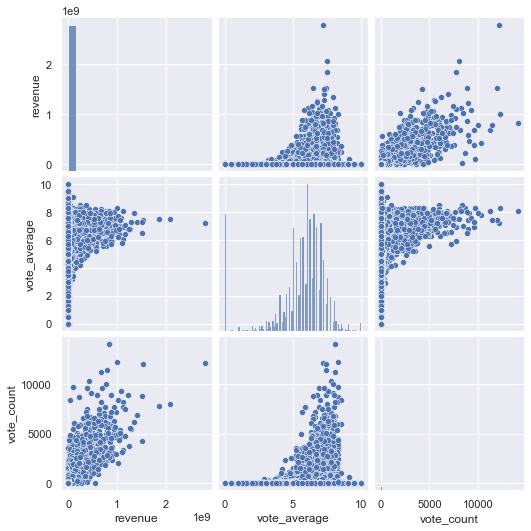

In [43]:
sns.pairplot(md)

 If there are more than two variables, then it is better to use the pairplot () function which shows all paired and individual distributions, which makes some tasks easier.